To run this notebook on mybinder.org click this button:
[![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/mhlr/notebooks/Higgins-Selkov.ipynb)

In [1]:
%pylab inline
from ipywidgets import interact, interactive, fixed
from scipy.integrate import odeint
#plt.style.use('seaborn-colorblind')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def dS(S,P,v0,k1,k2):
    return v0-k1*(P**2)*S

def dP(S,P,v0,k1,k2):
    return k1*(P**2)*S - k2*P

def dSP(y,t,*rest):
    return array([dS(y[0], y[1], *rest),
                  dP(y[0], y[1], *rest)])

def trajectorySP(v0,k1,k2,S0,P0,tmax,tdelta):
    figure(figsize=(5,5))
    sol=odeint(dSP, array([S0, P0]), arange(0,tmax,tdelta), (v0,k1,k2))
    plot(sol[:,0], sol[:,1])

def streamSP(v0,k1,k2,Smin,Smax,Sdelta,Pmin,Pmax,Pdelta):
    figure(figsize=(5,5))
    S, P = np.meshgrid(np.arange(Smin,Smax,Sdelta), np.arange(Pmin,Pmax,Pdelta))
    streamplot(S,P,dS(S,P,v0,k1,k2), dP(S,P,v0,k1,k2))

def quiverSP(v0,k1,k2,Smin,Smax,Sdelta,Pmin,Pmax,Pdelta):
    figure(figsize=(5,5))
    S, P = np.meshgrid(np.arange(Smin,Smax,Sdelta), np.arange(Pmin,Pmax,Pdelta))
    quiver(dS(S,P,v0,k1,k2), dP(S,P,v0,k1,k2))

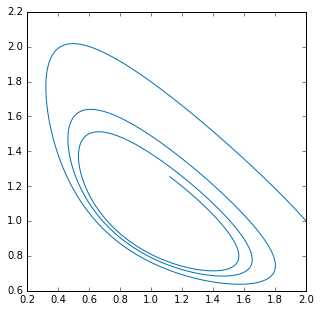

In [3]:
result = interact(trajectorySP, v0=1., k1=1., k2=1.0001, S0=2., P0=1., tmax=20., tdelta=0.01)

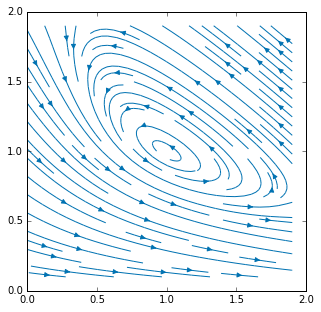

In [4]:
result = interact(streamSP, v0=1., k1=1., k2=1., Smin=0., Smax=2., Sdelta=0.1, Pmin=0., Pmax=2., Pdelta=0.1)

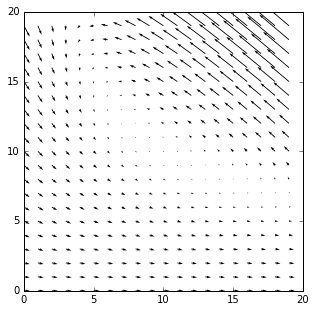

In [5]:
result = interact(quiverSP, v0=1., k1=1., k2=1., Smin=0., Smax=2., Sdelta=0.1, Pmin=0., Pmax=2., Pdelta=0.1)

In [6]:
docstr = """
# could also try a symbolic solution
# but that seems to take a forever

from sympy import *

var('v0 k1 k2 t')
S=Function("S")(t)
P=Function("P")(t)
def dt(fn):
    return Derivative(fn,t)

eqS=Eq(dt(S), v0-k1*(P**2)*S)
eqP=Eq(dt(P), k1*(P**2)*S - k2*P)
sol = dsolve((eqS,eqP))
"""
